In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('Compiled_descriptors.csv')

In [3]:
df=df.iloc[:,1:]

In [4]:
df.columns[:-1]

Index(['MW', 'AMW', 'Sv', 'Mv', 'Me', 'Mp', 'Mi', 'GD', 'nTA', 'nBM',
       ...
       'ALOGP2', 'PDI', 'BLTF96', 'DLS_02', 'DLS_03', 'DLS_04', 'DLS_06',
       'DLS_cons', 'LLS_01', 'LLS_02'],
      dtype='object', length=737)

In [5]:
df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
0,359.4,8.357,28.24,0.657,1.034,0.658,1.123,0.083,7.0,15.0,...,0.845,-2.11,0.83,0.83,0.7,0.67,0.61,0.17,0.88,0
1,368.4,7.839,30.56,0.650,1.017,0.667,1.115,0.080,6.0,16.0,...,0.880,-2.87,1.00,1.00,0.6,1.00,0.80,0.33,1.00,1
2,370.5,6.501,33.76,0.592,0.992,0.636,1.124,0.080,8.0,10.0,...,0.886,-5.32,0.83,1.00,1.0,1.00,0.94,0.17,0.88,2
3,249.3,7.334,22.23,0.654,0.988,0.694,1.117,0.123,0.0,17.0,...,1.018,-4.72,1.00,1.00,0.6,1.00,0.87,0.67,1.00,2
4,269.8,8.702,21.53,0.694,1.002,0.732,1.113,0.123,1.0,17.0,...,1.023,-4.95,1.00,1.00,0.6,1.00,0.76,0.83,1.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,304.3,8.949,23.16,0.681,1.047,0.669,1.116,0.104,6.0,13.0,...,0.841,-1.32,1.00,1.00,0.4,1.00,0.77,0.33,1.00,2
565,365.6,7.947,30.42,0.661,0.984,0.729,1.104,0.093,2.0,15.0,...,1.023,-4.75,1.00,1.00,0.8,1.00,0.90,0.33,1.00,1
566,265.4,6.805,24.28,0.623,0.984,0.669,1.123,0.116,4.0,16.0,...,1.000,-3.84,1.00,1.00,0.8,1.00,0.90,1.00,1.00,0
567,292.3,8.119,21.45,0.596,1.056,0.583,1.155,0.100,8.0,4.0,...,0.769,-0.24,0.67,0.83,0.9,0.67,0.72,0.33,0.75,2


In [6]:
x=df.drop('Class',axis=1)
y=df['Class']

In [7]:
scalar= MinMaxScaler((0,400))
scaled_data=scalar.fit_transform(x,y)

In [8]:
new_df=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [9]:
new_df['Class']=df['Class']

In [10]:
new_df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
0,67.712587,95.222930,85.575758,327.272727,218.867925,119.197708,172.093023,109.565217,155.555556,130.434783,...,302.055407,234.482759,332.0,298.507463,266.666667,240.963855,212.048193,68.0,323.809524,0
1,70.291568,76.893135,92.606061,323.785803,154.716981,129.512894,134.883721,104.347826,133.333333,139.130435,...,314.566577,195.657727,400.0,400.000000,222.222222,400.000000,303.614458,132.0,400.000000,1
2,70.893330,29.547063,102.303030,294.894147,60.377358,93.982808,176.744186,104.347826,177.777778,86.956522,...,316.711349,70.498084,332.0,400.000000,400.000000,400.000000,371.084337,68.0,323.809524,2
3,36.163049,59.023355,67.363636,325.778331,45.283019,160.458453,144.186047,179.130435,0.000000,147.826087,...,363.896336,101.149425,400.0,400.000000,222.222222,400.000000,337.349398,268.0,400.000000,2
4,42.037395,107.430998,65.242424,345.703611,98.113208,204.011461,125.581395,179.130435,22.222222,147.826087,...,365.683646,89.399745,400.0,400.000000,222.222222,400.000000,284.337349,332.0,400.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,51.923490,116.171267,70.181818,339.227895,267.924528,131.805158,139.534884,146.086957,133.333333,113.043478,...,300.625559,274.840358,400.0,400.000000,133.333333,400.000000,289.156627,132.0,400.000000,2
565,69.489218,80.714791,92.181818,329.265255,30.188679,200.573066,83.720930,126.956522,44.444444,130.434783,...,365.683646,99.616858,400.0,400.000000,311.111111,400.000000,351.807229,132.0,400.000000,1
566,40.776560,40.304317,73.575758,310.336239,30.188679,131.805158,172.093023,166.956522,88.888889,139.130435,...,357.462020,146.104725,400.0,400.000000,311.111111,400.000000,351.807229,400.0,400.000000,0
567,48.484848,86.801132,65.000000,296.886675,301.886792,33.237822,320.930233,139.130435,177.777778,34.782609,...,274.888293,330.012771,268.0,298.507463,355.555556,240.963855,265.060241,132.0,241.269841,2


In [11]:
x_trf=new_df.drop('Class',axis=1)
y_trf=new_df['Class']

In [12]:
k=30
features_chi2=SelectKBest(chi2, k=k)
x_new=features_chi2.fit_transform(x_trf,y_trf)
selected_features=df.columns[:-1][features_chi2.get_support()]

In [13]:
print(selected_features.to_list())
final_df=df[selected_features.to_list()]

['nF', 'nX', 'P_VSA_ppp_hal', 'SM03_EA(dm)', 'nR=Cs', 'nR=Ct', 'C-005', 'C-006', 'C-016', 'H-053', 'O-060', 'SdsCH', 'CATS2D_04_DD', 'CATS2D_04_DA', 'CATS2D_05_DA', 'CATS2D_07_DL', 'CATS2D_03_PL', 'T(O..F)', 'T(F..F)', 'F03[C-S]', 'F04[N-Cl]', 'F05[C-S]', 'F05[N-N]', 'F05[N-F]', 'F06[C-F]', 'F07[C-F]', 'F07[C-Br]', 'F09[C-F]', 'F09[N-F]', 'F10[C-F]']


In [14]:
final_df['Class']=df['Class']
m=final_df.columns.to_list()

C:\Users\Akshat\AppData\Local\Temp\ipykernel_8672\3084608001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Class']=df['Class']


In [15]:
x_final=new_df.drop("Class",axis=1)
y_final=new_df['Class']

In [18]:
abs(new_df.corr(method='spearman')['Class']).sort_values(ascending=False).head(10)

Class            1.000000
C-005            0.311539
VE3sign_D/Dt     0.293905
CATS2D_04_DA     0.293005
C-016            0.272676
MATS2p           0.268890
P_VSA_e_2        0.248003
SdsCH            0.246290
VE3sign_Dz(p)    0.246287
P_VSA_i_2        0.239823
Name: Class, dtype: float64

In [19]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
clf1=RandomForestClassifier()
clf2=LogisticRegression()
clf3=GradientBoostingClassifier()

In [21]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('RF', clf1),  # Include the first classifier (Logistic Regression)
          # Include the second classifier (Random Forest)
        ('GBC', clf3),  # Include the third classifier (Naive Bayes)
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
) 

In [26]:
np.mean(cross_val_score(clf3,x_final,y_final,cv=20,scoring='accuracy'))

In [22]:
len(m)

31

In [23]:
new_df[final_df.columns.to_list()]

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.000000,0.0,162.742608,133.333333,0.000000,0.000000,0.000000,133.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.000000,400.000000,0.000000,133.333333,0.000000,333.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.0,0.000000,266.666667,133.333333,0.000000,0.000000,266.666667,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,26.666667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,66.666667,100.0,0.000000,0.000000,0.000000,0.000000,26.666667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.000000,0.0,58.770180,200.000000,0.000000,0.000000,53.333333,200.000000,0.0,...,72.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.000000,0.0,41.356793,0.000000,0.000000,266.666667,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.000000,0.0,258.879013,0.000000,0.000000,0.000000,160.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [24]:
one_df=df[m]

In [25]:
one_df

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.0,0.00,2.243,2.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.00,0.000,6.0,0.0,2.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.00,0.000,4.0,2.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.00,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,1.0,39.15,0.000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.0,0.00,0.810,3.0,0.0,0.0,2.0,3.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.0,0.00,0.570,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.0,0.00,3.568,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [26]:
x_trf=one_df.drop('Class',axis=1)
y_trf=one_df['Class']

In [32]:
x_trf=new_df

In [33]:
new_df.corr(method='kendall')['Class'].sort_values().tail(10)

SpDiam_AEA(bo)    0.172394
Chi1_EA(dm)       0.177936
GATS2i            0.178341
SssCH2            0.179395
MCD               0.180083
GATS2p            0.181418
CATS2D_04_DD      0.200955
F03[N-N]          0.216606
CATS2D_04_DA      0.251465
Class             1.000000
Name: Class, dtype: float64

In [34]:
chi2_values, p_values = chi2(x_trf, y_trf)

In [35]:
chi2_df = pd.DataFrame({
    'Feature': x_trf.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
})


In [36]:
k=chi2_df['Chi2 Value'].sort_values(ascending=False).head(20).index.to_list()

In [37]:
chi2_df['Chi2 Value'].sort_values(ascending=False).head(20)


632    12656.383169
638    11098.930386
676     7946.475358
512     7063.807070
515     6190.267200
714     5883.768229
566     4914.718082
16      4699.042697
685     4581.504013
565     4474.813309
20      4284.200786
513     3680.769950
534     3626.381428
662     3398.076431
558     3371.338159
526     3345.193075
502     2966.163649
687     2902.277292
652     2841.875707
503     2772.627138
Name: Chi2 Value, dtype: float64

In [38]:
mask1=chi2_df['P-Value']<=0.05
mask2=chi2_df['Chi2 Value']>=9.00

In [39]:
j=chi2_df[mask1&mask2]['Feature'].tolist()

In [40]:
j

['MW',
 'AMW',
 'Sv',
 'Mv',
 'Me',
 'Mp',
 'Mi',
 'GD',
 'nTA',
 'nBM',
 'RBN',
 'RBF',
 'nDB',
 'nAB',
 'nN',
 'nO',
 'nF',
 'nCL',
 'nHM',
 'nHet',
 'nX',
 'H%',
 'C%',
 'N%',
 'O%',
 'nCsp3',
 'nCsp2',
 'nCIC',
 'nCIR',
 'Rbrid',
 'MCD',
 'RFD',
 'NRS',
 'NNRS',
 'nR05',
 'nR06',
 'nR09',
 'nR10',
 'nBnz',
 'ARR',
 'D/Dtr05',
 'D/Dtr06',
 'D/Dtr09',
 'D/Dtr10',
 'D/Dtr11',
 'ZM1V',
 'ZM1Mad',
 'Qindex',
 'DBI',
 'HNar',
 'Xt',
 'Ram',
 'BLI',
 'MSD',
 'SPI',
 'PJI2',
 'CENT',
 'ICR',
 'Wap',
 'PW2',
 'PW3',
 'PW4',
 'PW5',
 'MAXDN',
 'MAXDP',
 'DELS',
 'TIE',
 'Psi_i_A',
 'Psi_i_t',
 'BAC',
 'LOC',
 'SRW05',
 'piID',
 'PCR',
 'PCD',
 'X0A',
 'X1A',
 'X2A',
 'X3A',
 'X4A',
 'X5A',
 'X0Av',
 'X3Av',
 'AAC',
 'IDDE',
 'IVDE',
 'Ges',
 'rGes',
 'Vindex',
 'IC1',
 'SIC0',
 'SIC1',
 'SIC2',
 'SIC3',
 'CIC0',
 'CIC1',
 'CIC2',
 'CIC3',
 'SpPosA_A',
 'SpMax_A',
 'VE1_A',
 'VE2_A',
 'VE1sign_A',
 'VE2sign_A',
 'VE3sign_A',
 'VR2_A',
 'Chi_D',
 'ChiA_D',
 'J_D',
 'EE_D',
 'VE2_D',
 'VE1sign_

In [41]:
k

[632,
 638,
 676,
 512,
 515,
 714,
 566,
 16,
 685,
 565,
 20,
 513,
 534,
 662,
 558,
 526,
 502,
 687,
 652,
 503]

In [42]:
k=chi2_df[mask1&mask2]['Feature'].to_list()

In [43]:
final_df=new_df[j]

In [44]:
final_df['Class']=new_df['Class']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_8672\695168134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Class']=new_df['Class']


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
new_df=new_df.rank()

In [75]:
clf1=RandomForestClassifier(n_estimators=1000)


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

In [78]:
lst=[]

In [80]:
lst.append(np.mean(cross_val_score(clf1,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

In [82]:
lst.append(np.mean(cross_val_score(clf2,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf3,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf4,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf5,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf6,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [83]:
lst

[0.8224358974358974,
 1.0,
 0.6542986425339367,
 1.0,
 0.6621794871794873,
 0.671870286576169]

In [52]:
plt.

SyntaxError: invalid syntax (457645448.py, line 1)

In [53]:
x_train_trf,x_test_trf,y_train_trf,y_test_trf=train_test_split(x_trf,y_trf,random_state=42,test_size=0.1)

In [201]:
clf1.fit(x_train_trf,y_train_trf)
y_pred=clf1.predict(x_test_trf)

In [107]:
clf2=GradientBoostingClassifier()
clf3=LogisticRegression(max_iter=2000)
clf4=AdaBoostClassifier()

In [66]:
lst.append(np.mean(cross_val_score(clf5,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf6,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))
#lst.append(np.mean(cross_val_score(clf4,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

In [108]:
lst.append(np.mean(cross_val_score(clf3,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [ ]:
clf2=RandomForestClassifier()

In [285]:
accuracy_score(y_pred,y_test_trf)

0.3508771929824561

In [289]:
np.mean(cross_val_score(clf2,x_trf,y_trf,cv=10,scoring='accuracy'))

0.5552318295739348

In [288]:
np.mean(cross_val_score(clf1,x_train_trf,y_train_trf,cv=10,scoring='accuracy'))

0.7246983408748114

In [65]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
clf5=SVC()
clf4=AdaBoostClassifier()
clf6=KNeighborsClassifier()

In [ ]:
np.mean(cross_val_score(clf,x_train_trf,y_train_trf,cv=10,scoring='accuracy'))

In [101]:
x_test_trf

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,ALOGP2,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02
204,0.317645,0.281847,0.340455,0.874222,0.518868,0.424069,0.209302,0.152174,0.444444,0.608696,...,0.116478,0.852547,0.560664,0.50,0.746269,0.222222,0.602410,0.409639,0.17,0.396825
70,0.190773,0.216472,0.245000,0.839352,0.358491,0.389685,0.279070,0.243478,0.277778,0.456522,...,0.076418,0.837355,0.357599,1.00,1.000000,0.555556,1.000000,0.759036,0.33,1.000000
131,0.498603,0.123408,0.541288,0.767123,0.216981,0.277937,0.534884,0.069565,0.444444,0.652174,...,0.099408,0.863271,0.269476,0.33,0.253731,0.777778,0.192771,0.397590,0.00,0.000000
431,0.346515,0.095276,0.404848,0.739726,0.216981,0.217765,0.546512,0.126087,0.444444,0.434783,...,0.076813,0.815907,0.394636,0.50,0.507463,0.888889,0.602410,0.650602,0.17,0.396825
540,0.162906,0.144639,0.227727,0.779577,0.226415,0.297994,0.581395,0.300000,0.055556,0.369565,...,0.018298,0.904379,0.395913,1.00,1.000000,0.777778,1.000000,0.879518,0.33,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.180027,0.218861,0.234242,0.836862,0.339623,0.386819,0.395349,0.282609,0.166667,0.413043,...,0.034484,0.939231,0.438059,1.00,1.000000,0.555556,1.000000,0.843373,0.50,0.809524
75,0.162118,0.185686,0.222879,0.814446,0.301887,0.352436,0.406977,0.286957,0.222222,0.347826,...,0.020799,0.854334,0.335888,1.00,1.000000,0.555556,1.000000,0.759036,0.17,1.000000
249,0.181603,0.093595,0.256970,0.754670,0.113208,0.275072,0.569767,0.256522,0.055556,0.391304,...,0.085298,0.869526,0.264368,0.83,0.746269,1.000000,0.795181,0.746988,0.17,0.809524
238,0.147647,0.381281,0.172348,0.858032,0.245283,0.512894,0.383721,0.417391,0.111111,0.369565,...,0.072817,0.924933,0.224777,1.00,1.000000,0.555556,1.000000,0.710843,0.33,1.000000


In [102]:
x_df=pd.concat([x_train_trf,x_test_trf],axis=0)

In [103]:
y_df=new_df['Class']

In [104]:
the_df=pd.concat([x_df,y_df],axis=1)

In [105]:
the_df.to_csv('for_regression1.csv')

In [106]:
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [298]:
classification_report(y_pred,y_test_trf)

'              precision    recall  f1-score   support\n\n           0       0.50      0.57      0.53        14\n           1       0.47      0.54      0.50        13\n           2       0.96      0.83      0.89        30\n\n    accuracy                           0.70        57\n   macro avg       0.64      0.65      0.64        57\nweighted avg       0.74      0.70      0.71        57\n'

In [277]:
confusion_matrix(y_test_trf,y_pred)

array([[ 8,  5,  2],
       [ 4,  3,  7],
       [ 3,  5, 20]], dtype=int64)

In [111]:
matthews_corrcoef(y_test_trf,y_pred)

0.47846978638064225

In [101]:
lst.append(np.mean(cross_val_score(voting_clf_hard,x_train_trf,y_train_trf,cv=10,scoring='accuracy')))

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [94]:
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [110]:
plotting_df=pd.DataFrame(columns=['Mod','Accuracy'])

In [111]:
plotting_df['Mod']=['RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','AdaBoostClassifier','SVC', 'KNN', '60_mod_ens', '60_rf', 'tuned_lR']

In [112]:
plotting_df['Accuracy']=lst

In [113]:
plotting_df

,Mod,Accuracy
0,RandomForestClassifier,0.822436
1,GradientBoostingClassifier,1.000000
2,LogisticRegression,0.654299
3,AdaBoostClassifier,1.000000
4,SVC,0.662179
5,KNN,0.671870
6,60_mod_ens,0.695400
7,60_rf,0.753959
8,tuned_lR,0.654299


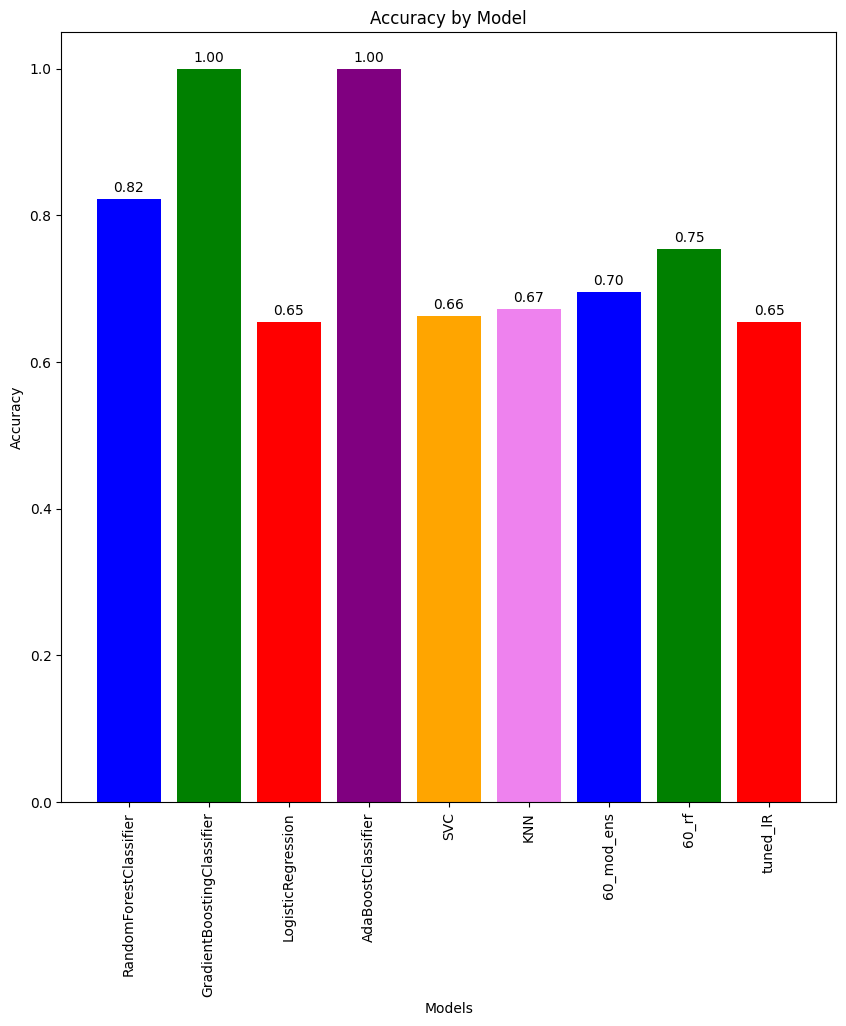

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
# Assuming 'plotting' is a dictionary with 'Mod' and 'Accuracy' columns

# Define a color list
colors = ['blue', 'green', 'red', 'purple', 'orange','violet']  # Adjust colors and length as needed

# Create the bar plot with custom colors
plt.bar(x=plotting_df['Mod'], height=plotting_df['Accuracy'], color=colors[:len(plotting_df['Mod'])])

# Rotate x-axis labels (optional)
plt.xticks(rotation='vertical')  
for i, (v, label) in enumerate(zip(plotting_df['Accuracy'], plotting_df['Mod'])):
  y_pos = v + 0.01  # Adjust y position for label placement
  plt.text(i, y_pos, f"{v:.2f}", ha='center')  # Format accuracy with 2 decimal places


# Add accuracy labels using plt.text (optional)
# ... (code for adding accuracy labels remains the same)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy by Model")
plt.show()

In [261]:
from sklearn.metrics import confusion_matrix

In [100]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('SVC', clf5),  # Include the first classifier (Logistic Regression)
          # Include the second classifier (Random Forest)
        ('LR', clf3),  # Include the third classifier (Naive Bayes)
        ('KNN', clf6),
        ('RF', clf1)
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
) 

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [345]:
y_pred=clf4.predict(x_test_trf)

In [346]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test_trf)

0.5964912280701754

In [347]:
confusion_matrix(y_test_trf,y_pred)


array([[ 9,  4,  3],
       [ 4,  4,  7],
       [ 3,  2, 21]], dtype=int64)

In [348]:
pd.DataFrame(confusion_matrix(y_test_trf,y_pred))

,0,1,2
0,9,4,3
1,4,4,7
2,3,2,21


In [349]:
classification_report(y_pred, y_test_trf)

'              precision    recall  f1-score   support\n\n           0       0.56      0.56      0.56        16\n           1       0.27      0.40      0.32        10\n           2       0.81      0.68      0.74        31\n\n    accuracy                           0.60        57\n   macro avg       0.55      0.55      0.54        57\nweighted avg       0.64      0.60      0.61        57\n'